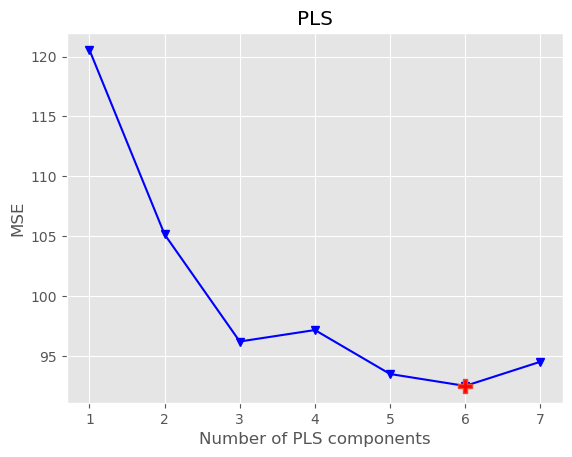

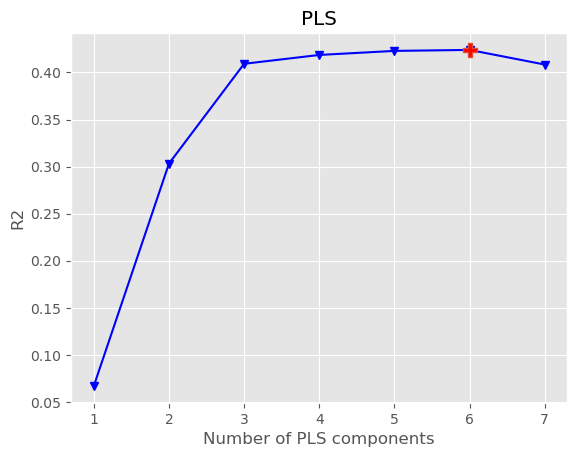

IndexError: index 16 is out of bounds for axis 0 with size 7

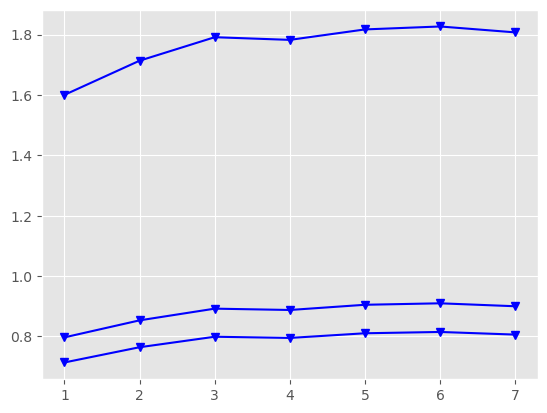

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

def load_data():
  df = pd.read_csv('data/concrete.csv')
  return df

def optimise_pls_cv(X, y, n_comp):
  pls = PLSRegression(n_components=n_comp, scale=True)
  y_cv = cross_val_predict(pls, X, y, cv=10)
  r2 = r2_score(y, y_cv)
  mse = mean_squared_error(y, y_cv)
  rpd = y.std()/np.sqrt(mse)
  return (y_cv, r2, mse, rpd)

def plot_metrics(vals, ylabel, objective, xticks):
  with plt.style.context('ggplot'):
    plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
    if objective=='min':
      idx = np.argmin(vals)
    else:
      idx = np.argmax(vals)
    plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')
    plt.xlabel('Number of PLS components')
    plt.xticks = xticks
    plt.ylabel(ylabel)
    plt.title('PLS')
  plt.show()
    
def do_pls(df, n_components=-1):
  Y_cols = ["slump", "flow", "compressive_strength"]
  X_cols = ["cement", "slag", "fly_ash", "water", "superplasticizer", "coarse_aggregate", "fine_aggregate"]
  Y = df[Y_cols]
  X = df[X_cols]
#   print(X, "\n")
#   print(Y)
  
  if n_components == -1:
    r2s = []
    mses = []
    rpds = []
    xticks = np.arange(1, X.shape[1] + 1)
    for n_comp in xticks:
      y_cv, r2, mse, rpd = optimise_pls_cv(X, Y, n_comp)
      r2s.append(r2)
      mses.append(mse)
      rpds.append(rpd)
    plot_metrics(mses, 'MSE', 'min', xticks)
    plot_metrics(r2s, 'R2', 'max', xticks)
    plot_metrics(rpds, 'RPD', 'max', xticks)
    n_components = np.argmin(mses) + 1
  
  pls = PLSRegression(n_components=n_components, scale=True)
  pls.fit(X, Y)
  loadings = pd.DataFrame(pls.x_loadings_)
  scores = pd.DataFrame(pls.x_scores_)
  
  X_rows_dict = {i : X_cols[i] for i in range(0, len(X_cols))}
  X_cols_dict = {i : 'LV' + str(i+1) for i in range(0, n_components)}
  loadings.rename(index=X_rows_dict, columns=X_cols_dict, inplace=True)
  print(loadings)
  
df = load_data()
plt.close()
do_pls(df)